# Taller: Regresión Logística Aplicada a Datos de la ENS 2016-2017

## 1. Introducción

La regresión logística es una herramienta clave para analizar relaciones entre variables predictoras y un resultado binario o categórico. En salud pública, permite estudiar factores asociados a condiciones como la obesidad, el consumo riesgoso de alcohol o la diabetes.

En este taller trabajaremos con datos de la Encuesta Nacional de Salud (ENS) 2016-2017 para:

- Estimar la probabilidad de obesidad según hábitos de vida y condiciones clínicas.
- Modelar el exceso de consumo de alcohol a partir de variables sociodemográficas.
- Explorar relaciones causales mediante modelos logísticos ajustados.



## 2. Objetivos del Taller

Al finalizar el taller, los y las estudiantes serán capaces de:

- Preparar variables binarias y categóricas para regresión logística.
- Ajustar modelos de regresión logística para variables dicotómicas y ordinales.
- Seleccionar variables relevantes utilizando estrategias como *backward elimination*.
- Interpretar coeficientes como *odds ratios* y evaluar modelos con métricas como AUC-ROC.
- Aplicar lógica causal en el diseño e interpretación de modelos.


## 3. Dataset
La **Encuesta Nacional de Salud (ENS) 2016-2017** es un estudio representativo de la población chilena que recopila información sobre salud, estilo de vida y uso de servicios sanitarios. En este taller utilizaremos un subconjunto de estas variables para aplicar modelos estadísticos sobre datos reales de salud pública. Los datos son de acceso público y están disponibles [aquí](https://data.mendeley.com/datasets/3myh3nzcy3/1).

![](img/ens.png)

### 3.1 Librerías necesarias
Las siguientes librerias son necesarias para el análisis de datos y visualización. 

In [1]:
%%capture
# Instalar librerias para leer archivos SPSS
!pip install pyreadstat

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

### 3.2 Cargar Datos

Tal como se realizo en el taller anterior, se descargara la base de datos utilizando `wget` y luego se cargara la base de datos en la variable `ens` utilizando la función de pandas `read_spss`.  

In [3]:
# Descargar ENS
!wget https://github.com/iHealthInstitute/Talleres_Diplomado_iHealth/raw/refs/heads/main/data/ENS2016-2017.sav

--2025-07-23 14:30:02--  https://github.com/iHealthInstitute/Talleres_Diplomado_iHealth/raw/refs/heads/main/data/ENS2016-2017.sav
Resolviendo github.com (github.com)... 20.201.28.151
Conectando con github.com (github.com)[20.201.28.151]:443... conectado.
Petición HTTP enviada, esperando respuesta... 302 Found
Localización: https://raw.githubusercontent.com/iHealthInstitute/Talleres_Diplomado_iHealth/refs/heads/main/data/ENS2016-2017.sav [siguiendo]
--2025-07-23 14:30:03--  https://raw.githubusercontent.com/iHealthInstitute/Talleres_Diplomado_iHealth/refs/heads/main/data/ENS2016-2017.sav
Resolviendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)[185.199.109.133]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 34441286 (33M) [application/octet-stream]
Grabando a: «ENS2016-2017.sav.5»

ENS2016-2017.sav.5  100%[==============

In [4]:
ens = pd.read_spss('ENS2016-2017.sav')
print(ens.head())
print(ens.shape)

   IdEncuesta  FechaInicioF1               Region    Comuna    Zona  \
0     20006.0   1.369894e+10  XIII. Metropolitana  Santiago  URBANA   
1     20008.0   1.369964e+10  XIII. Metropolitana  Santiago  URBANA   
2     20011.0   1.369955e+10  XIII. Metropolitana  Santiago  URBANA   
3     20012.0   1.369903e+10  XIII. Metropolitana  Santiago  URBANA   
4     20013.0   1.369902e+10  XIII. Metropolitana  Santiago  URBANA   

   IdSegmento  IdPersona_1      Ident7  Edad Edad_Codificada  ...  \
0  13101101.0        241.0  1977-12-18  38.0         25 - 44  ...   
1  13101101.0        197.0  1991-10-23  25.0         25 - 44  ...   
2  13101102.0        321.0  1996-05-31  20.0           15-24  ...   
3  13101102.0        245.0  1931-04-14  85.0             65+  ...   
4  13101102.0        242.0  1975-06-24  41.0         25 - 44  ...   

  fg_CKDschwartz_diminuido_60 fg_CKDschwartz_diminuido_30 Fechaini_F1  \
0                         NaN                         NaN  2016-11-19   
1           

#### **Ejercicio**


Chile es un país con una alta prevalencia de obesidad y enfermedades crónicas asociadas. Se quiere investigar la relación entre el Sexo, actividad fisica, consumo de alcohol, diabetes, hipertensión y region de residencia con la obesidad. Para esto, se utilizará una regresión logistica para modelar la probabilidad de obesidad en función de estas variables.

En este ejercicio deberas
1. Filtrar la muestra para incluir solo personas normopeso u obesas. 
    - Normopeso: IMC entre 18.5 y 24.9
    - Obesidad: IMC mayor o igual a 30
    - Eliminar valores NaN
    
    Realize un histograma del IMC para visualizar la distribución de los datos. No deben existir valores en el rango de IMC entre 25 y 29.9, ya que estos corresponden a personas con sobrepeso, que no se incluirán en el análisis.
2. Crear una variable binaria `obesidad_binaria`: 1 = obeso, 0 = normopeso.
  Identifique la cantidad de personas obesas y normopeso en la muestra filtrada.
3. Cree nuevas variables binarias a partir de las siguientes variables:
    * `Sexo` (1: mujer, 0: hombre)
    * Actividad fisica en tiempo libre (`A10`): 
      - 1: sí (realiza actividad física)
      - 0: no (no realiza actividad física)
    * A fumado 100 cigarrillos en toda su vida? (`ta2`)  (1: sí, 0: no)
    * Diabetes (`di3`): 
      - 1: sí
      - 0: no 
    * Hipertensión diagnosticada (`h2`):
      - 1: sí
      - 0: no
    * Región (`Region`). Utilizar el diccionario `zona_dict` para crear una variable categórica con las siguientes categorías:
      - 1: centro/norte
      - 0: sur
  
4. Ajustar un modelo logístico y analizar los **odds ratios** y los valores p.
5. Responde:
    - ¿Qué variables son estadísticamente significativas?
    - ¿Cómo se interpretan los odds ratios de cada variable?
    - ¿Qué implicancias tienen estos resultados para la salud pública en Chile?
6. Simula una nueva observación con las siguientes características:
    - Sexo: mujer
    - Actividad física: sí
    - Fumador: no
    - Diabetes: no
    - Hipertensión: no
    - Región: centro/norte

   Calcula la probabilidad de obesidad para esta persona utilizando el modelo ajustado. ¿Qué implicancias tiene este resultado?
7. Genera un plot de las probabilidades de obesidad en función de las variables significativas del modelo. Utiliza un gráfico de barras para visualizar la probabilidad de obesidad según cada variable significativa.

In [110]:
zona_dict = {
    'I. Tarapacá': 'Norte',
    'II. Antofagasta': 'Norte',
    'III. Atacama': 'Norte',
    'XV. Arica y Parinacota': 'Norte',

    'IV. Coquimbo': 'Centro',
    'V. Valparaíso': 'Centro',
    'VI. L. Bdo. OHiggins': 'Centro',
    'VII. Maule': 'Centro',
    'XIII. Metropolitana': 'Centro',

    'VIII. Bíobío': 'Sur',
    'IX. La Araucanía': 'Sur',
    'X. Los Lagos': 'Sur',
    'XI. Aysén': 'Sur',
    'XII. Magallanes y Antártica': 'Sur',
    'XIV. Los Ríos': 'Sur'
}



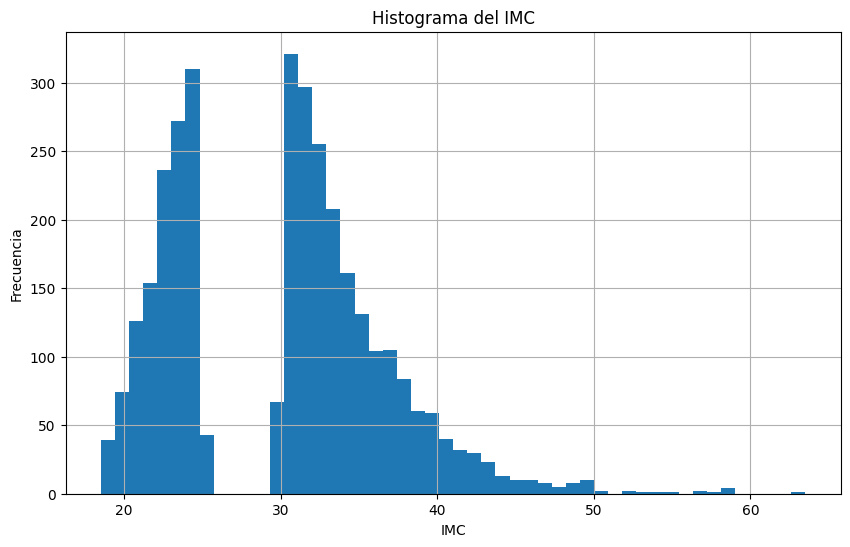

In [111]:
# <CODE> 1. Filtrar la muestra para incluir solo personas normopeso u obesas. </CODE>
ens_filtrado = ens.copy()
ens_filtrado = ens_filtrado[ens['IMC'].notna() & ((ens['IMC'] >= 18.5) & (ens['IMC'] <= 24.9) | (ens['IMC'] >= 30))]


fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ens_filtrado['IMC'].hist(bins=50, ax=ax)
ax.set_title('Histograma del IMC')
ax.set_xlabel('IMC')
ax.set_ylabel('Frecuencia')
plt.show()





In [112]:
# <CODE> 2. Crear una variable binaria obesidad_binaria </CODE>
ens_filtrado.loc[:, 'obesidad_binaria'] = ens_filtrado['IMC'] > 30
print(ens_filtrado['obesidad_binaria'].value_counts())


obesidad_binaria
True     2054
False    1256
Name: count, dtype: int64


In [113]:
# <CODE> 3. Crear variables binarias </CODE>
ens_filtrado.loc[:, 'sexo_binario'] = ens_filtrado['Sexo'].map(lambda x: 1 if x == 'MUJER' else 0)
ens_filtrado.loc[:, 'actividad_fisica'] = ens_filtrado['a10'].map(lambda x: 1 if x == 'SÍ' else 0)
ens_filtrado.loc[:, 'fumador_binario'] = ens_filtrado['ta2'].map({'NO': 0, 'SÍ': 1, 'NO RECUERDA': np.nan, 'NO ESTÁ SEGURO': np.nan})
ens_filtrado.loc[:, 'diabetes_binaria'] = ens_filtrado['di3'].map({'NO': 0, 'SÍ': 1, 'NO RECUERDO': np.nan})
ens_filtrado.loc[:, 'hipertension_binaria'] = ens_filtrado['h2'].map({'NO, NUNCA ME LO HAN DICHO': 0,
                                                                'SÍ, MÁS DE UNA VEZ': 1,
                                                                'SÍ, UNA SOLA VEZ ': 1,
                                                                'NO RECUERDO, NO ESTOY SEGURO(A)': np.nan})
ens_filtrado.loc[:, 'zona_binaria'] = ens_filtrado['Region'].map(zona_dict).map(lambda x: 1 if x in ['Norte', 'Centro'] else 0)

ens_filtrado = ens_filtrado[['obesidad_binaria', 'sexo_binario', 'actividad_fisica', 'fumador_binario', 'diabetes_binaria', 'hipertension_binaria', 'zona_binaria']]
ens_filtrado = ens_filtrado.dropna()

In [114]:
# <CODE> 4. Ajustar un modelo logístico 

# Variables predictoras y variable objetivo
X = ens_filtrado[[
    'sexo_binario',
    'actividad_fisica',
    'fumador_binario',
    'diabetes_binaria',
    'hipertension_binaria',
    'zona_binaria'
]]

X = sm.add_constant(X)  # Agregar constante
y = ens_filtrado['obesidad_binaria']

# Ajustar modelo logístico
model = sm.Logit(y, X)
result = model.fit()

# Resumen del modelo
print(result.summary())

# Calcular los odds ratios
odds_ratios = np.exp(result.params)
print("\n--- Odds Ratios ---")
print(odds_ratios)

# Calcular los valores p
print("\n--- Valores p ---")
print(result.pvalues)



Optimization terminated successfully.
         Current function value: 0.622252
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:       obesidad_binaria   No. Observations:                 2816
Model:                          Logit   Df Residuals:                     2809
Method:                           MLE   Df Model:                            6
Date:                Wed, 23 Jul 2025   Pseudo R-squ.:                 0.07291
Time:                        19:04:33   Log-Likelihood:                -1752.3
converged:                       True   LL-Null:                       -1890.1
Covariance Type:            nonrobust   LLR p-value:                 1.377e-56
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2333      0.101      2.320      0.020       0.036       0.430

In [115]:
# <CODE> 6. Simular una nueva observación 
nueva_observacion = pd.DataFrame({
    'const': [1],  # importante agregar constante
    'sexo_binario': [1],              # Mujer
    'actividad_fisica': [1],  # Sí
    'fumador_binario': [0],           # No
    'diabetes_binaria': [0],          # No
    'hipertension_binaria': [0],      # No
    'zona_binaria': [1]               # Centro/Norte
})

prediccion = result.predict(nueva_observacion)
print("\n--- Predicción para nueva observación ---")
print(f"Probabilidad de obesidad: {prediccion.iloc[0]:.4f}")


--- Predicción para nueva observación ---
Probabilidad de obesidad: 0.3523
